In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("amazon_alexa.tsv", sep='\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [6]:
df["date"] = pd.to_datetime(df.date)

<ipython-input-6-421e25f03991>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df.date)


In [7]:
df.describe()

,rating,date,feedback
count,3150.000000,3150,3150.000000
mean,4.463175,2018-07-24 02:39:05.142857472,0.918413
min,1.000000,2018-05-16 00:00:00,0.000000
25%,4.000000,2018-07-28 00:00:00,1.000000
50%,5.000000,2018-07-30 00:00:00,1.000000
75%,5.000000,2018-07-30 00:00:00,1.000000
max,5.000000,2018-07-31 00:00:00,1.000000
std,1.068506,NaN,0.273778


In [8]:
df.shape

(3150, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   rating            3150 non-null   int64         
 1   date              3150 non-null   datetime64[ns]
 2   variation         3150 non-null   object        
 3   verified_reviews  3149 non-null   object        
 4   feedback          3150 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 123.2+ KB


In [10]:
df.nunique()

rating                 5
date                  77
variation             16
verified_reviews    2300
feedback               2
dtype: int64

In [11]:
df.isna().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df["rating"].value_counts()

rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64

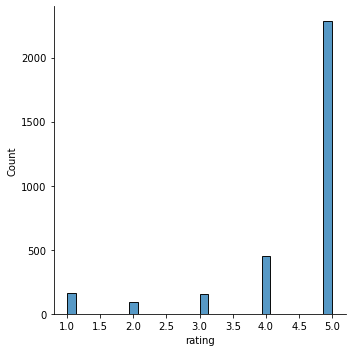

In [14]:
sns.displot(data = df, x='rating', legend = True);

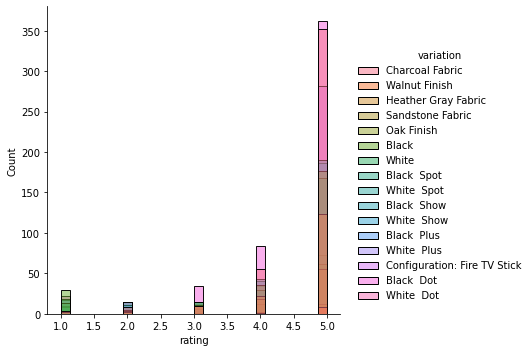

In [15]:
sns.displot(data = df, x='rating',hue ='variation', legend = True);

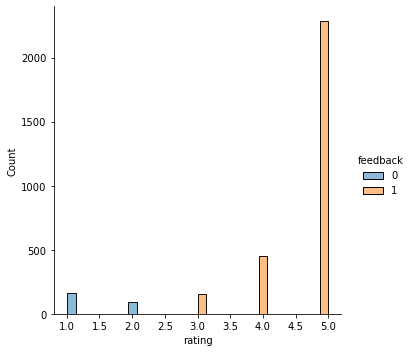

In [16]:
sns.displot(data = df, x='rating',hue ='feedback', legend = True);

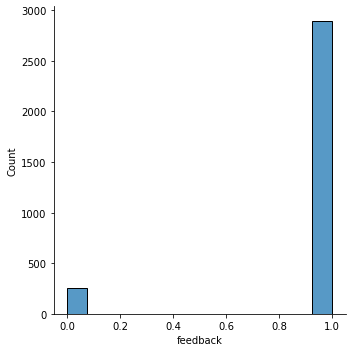

In [17]:
sns.displot(data = df, x='feedback', legend = True);

In [18]:
total_value = len(df["feedback"])
positive_comment = []
negative_comment = []

In [19]:
for i in df["feedback"]:
    if i == 1:
        positive_comment.append(df["feedback"])
    else:
        negative_comment.append(df["feedback"])

In [20]:
print(len(positive_comment), len(negative_comment))

2893 256


In [21]:
percent_of_positive_comment = len(positive_comment)/total_value*100
percent_of_negative_comment = len(negative_comment)/total_value*100

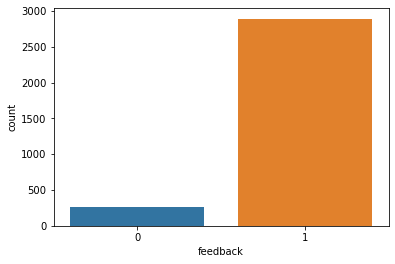

In [22]:
sns.countplot(x='feedback', data = df);

In [23]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1
1,5,2018-07-31,Charcoal Fabric,Loved it!,1
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,2018-07-31,Charcoal Fabric,Music,1


In [24]:
X = df["verified_reviews"]
y = df['feedback']

In [25]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer

In [26]:
#Tokenizers convert raw string input into integer input suitable for a Keras Embedding layer. 
#They can also convert back from predicted integer sequences to raw string output.
tokenizer = Tokenizer(15212, lower = True, oov_token= 'UNK')
tokenizer.fit_on_texts(X)

In [27]:
X = tokenizer.texts_to_sequences(X)

In [28]:
from keras_preprocessing.sequence import pad_sequences

In [29]:
#transforms a list (of length num_samples ) of sequences (lists of integers) into a 2D Numpy array of shape 
x_pad = pad_sequences(X, maxlen = 80, padding="post")
x_pad[0]

array([11,  8, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_pad, y, test_size=0.33, random_state=42)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [32]:
model = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', class_weight={0:6, 1: 1})

In [33]:
model.fit(X_train, y_train)
Y_train_predict = model.predict(X_train)
Y_predict = model.predict(X_test)

In [34]:
print(accuracy_score(y_test, Y_predict))

0.9019230769230769


In [35]:
def review_bot(feedback):
  sentence_lst=[]
  sentence_lst.append(feedback)
  sentence_seq=tokenizer.texts_to_sequences(sentence_lst)
  sentence_padded=pad_sequences(sentence_seq,maxlen=80,padding='post')
  ans=model.predict(sentence_padded)
  if ans.all() == 1:
    print("positive feedback")
  else:
    print("negative feedback")
review_bot(str(input("Enter a review : ")))

Enter a review : not bad
positive feedback
